In [ ]:
import pandas as pd # importing pandas
pd.set_option('display.max_columns', 10) # set display option to change appearance of dataframe
pd.set_option('display.max_rows', 10)
import numpy as np # import numpy
import matplotlib.pyplot as plt # importing plot from matlab lib, magic fn which print plot in output cell
%matplotlib inline
from math import pi # import pi value = 3.74
import seaborn as sns # importing seaborn lib
sns.set_style(style='darkgrid') # set style of plot
import warnings # import warning lib
warnings.filterwarnings('ignore')
import missingno as msno #importing missingno library to see null values clearly
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive

In [ ]:
mf = pd.read_csv('final-mf.csv')
print(mf.columns)

Index(['Age', 'Potential', 'Value', 'Crossing', 'ShortPassing', 'Dribbling',
       'LongPassing', 'BallControl', 'SprintSpeed', 'LongShots', 'Aggression',
       'Vision', 'BMI', 'Work Rate_NUM'],
      dtype='object')


In [ ]:
mf['BMI_floor'] = mf['BMI'].apply(np.floor)
mf['Value_of_log'] = np.log10(mf['Value'])

useless_columns = ['BMI','Value']
mf = mf.drop(useless_columns, axis=1)
print(mf.columns)

Index(['Age', 'Potential', 'Crossing', 'ShortPassing', 'Dribbling',
       'LongPassing', 'BallControl', 'SprintSpeed', 'LongShots', 'Aggression',
       'Vision', 'Work Rate_NUM', 'BMI_floor', 'Value_of_log'],
      dtype='object')


In [ ]:
X = mf[['Age', 'Potential', 'Crossing', 'ShortPassing', 'Dribbling',
        'BallControl', 'SprintSpeed', 'LongShots', 'Aggression',
       'Vision', 'Work Rate_NUM', 'BMI_floor']]

y = mf['Value_of_log']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
alpha = 1.0  # Regularization parameter (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
ridge_model_best = Ridge(alpha=best_alpha)
ridge_model_best.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the summary
print("Ridge Regression Model Summary")
print("-------------------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("-------------------------------")
print("Model Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef:.4f}")
print("-------------------------------")
print(f"Intercept: {ridge_model.intercept_:.4f}")

Ridge Regression Model Summary
-------------------------------
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared (R²): 0.90
-------------------------------
Model Coefficients:
Age: -0.0432
Potential: 0.2017
Crossing: 0.0161
ShortPassing: 0.1261
Dribbling: 0.0245
BallControl: 0.1170
SprintSpeed: 0.0929
LongShots: 0.0331
Aggression: 0.0387
Vision: 0.0281
Work Rate_NUM: -0.0091
BMI_floor: 0.0075
-------------------------------
Intercept: 6.2632


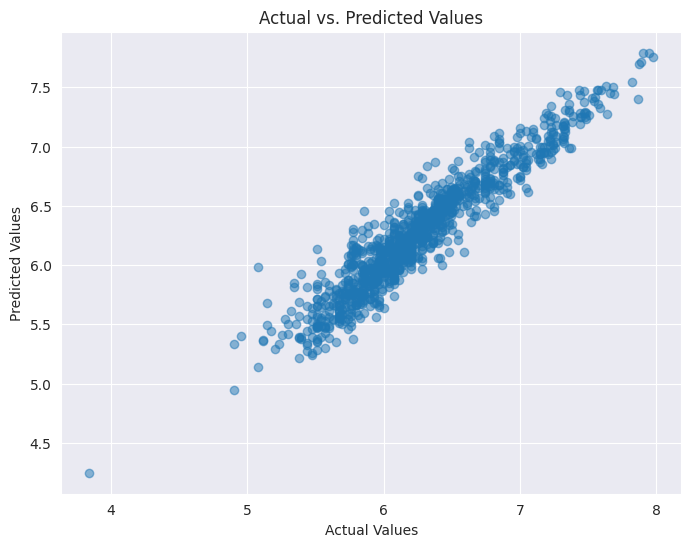

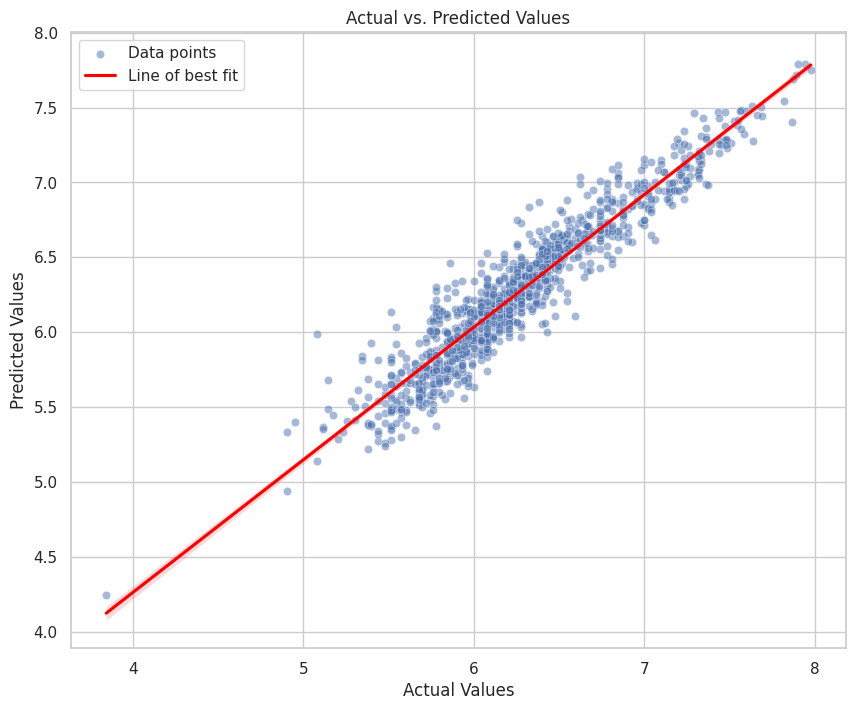

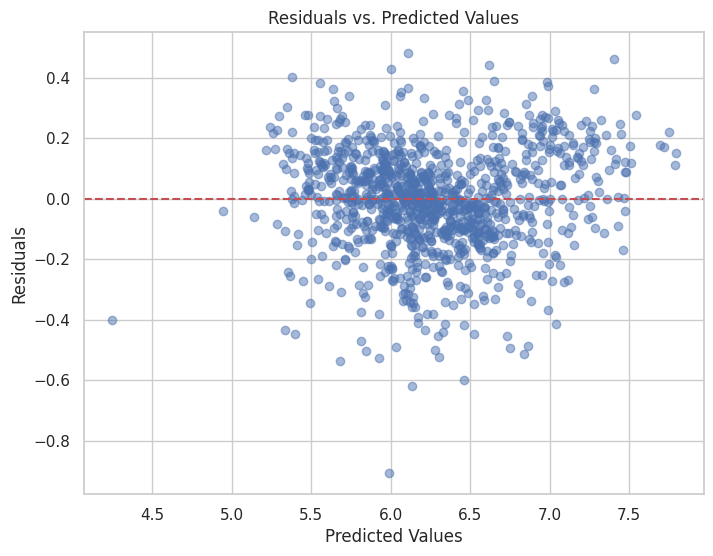

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label='Data points')
sns.regplot(x=y_test, y=y_pred, scatter=False, ax=ax, color='red', label='Line of best fit')

# Add titles and labels
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Create a scatter plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()